# THE SPARKS FOUNDATION


# DATA SCIENCE and BUSINESS ANALYTICS INTERNSHIP (GRIP JAN '22)


# Task 2 --> Prediction using Unsupervised Learning


# Author: Yassmen Youssef

In [68]:
# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# DataSet link : https://bit.ly/3kXTdox



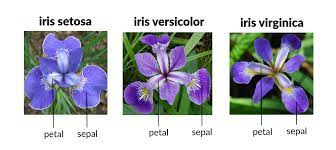

In [69]:
from IPython.display import Image
Image(filename='Iris_Flowers.jpg') 


In [70]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10,5]


In [71]:
#Loading of dataset
df = pd.read_csv('Iris.csv',index_col=0)
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [72]:
#Get the information of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [73]:
# Descriptive statistics of the data
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
# Finding the null values in the dataset 
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualization of the Data


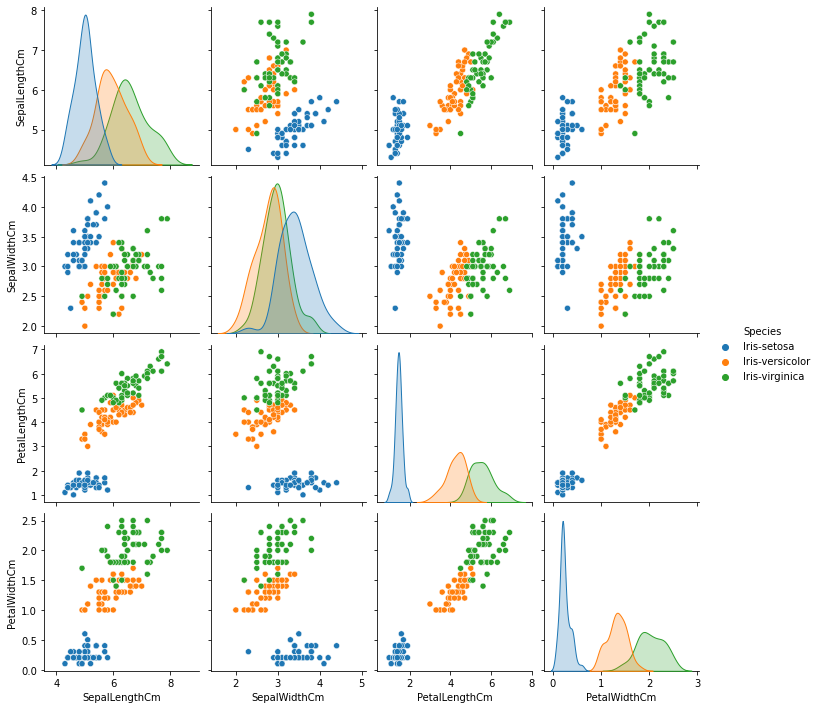

In [75]:
# checking the distribution of the data.

import seaborn as sns

sns.pairplot(df,hue='Species')


<AxesSubplot:>

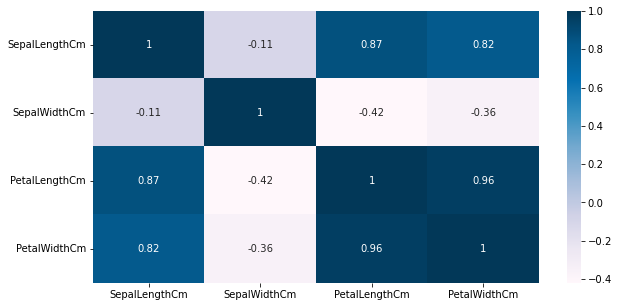

In [76]:
#Checking correlation of the data
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='PuBu')


# How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [77]:
X = df.iloc[:,[0, 1, 2, 3]].values

from sklearn.cluster import KMeans
# Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)




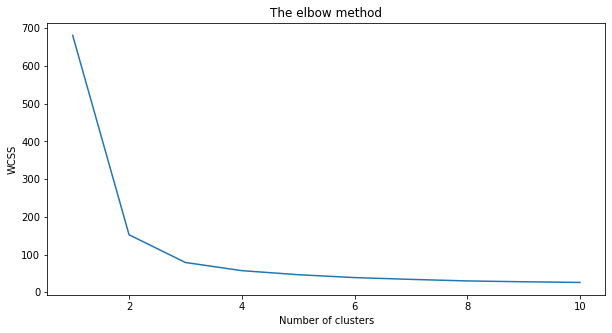

In [78]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The above elbow graph shows the possible number of clusters. we get optimum number of clusters at a point where 
the y coordinate doesn't decrease sigificantly and tends to be parallel to X axis 
hence we can safely choose 3 clusters as optimal number of clusters


In [79]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


In [80]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

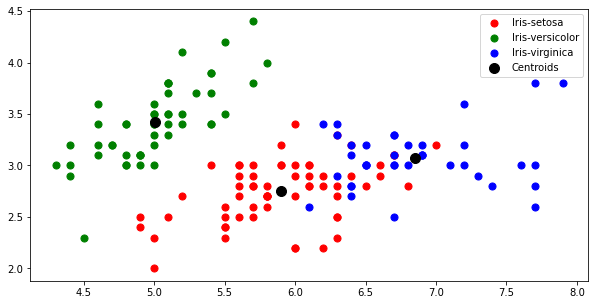

In [81]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=50, c= 'red',label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=50, c= 'green',label='Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=50, c= 'blue',label='Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c= 'black',label='Centroids')

plt.legend()
plt.show()


# 3-D Visualiztion of clusters and centroids

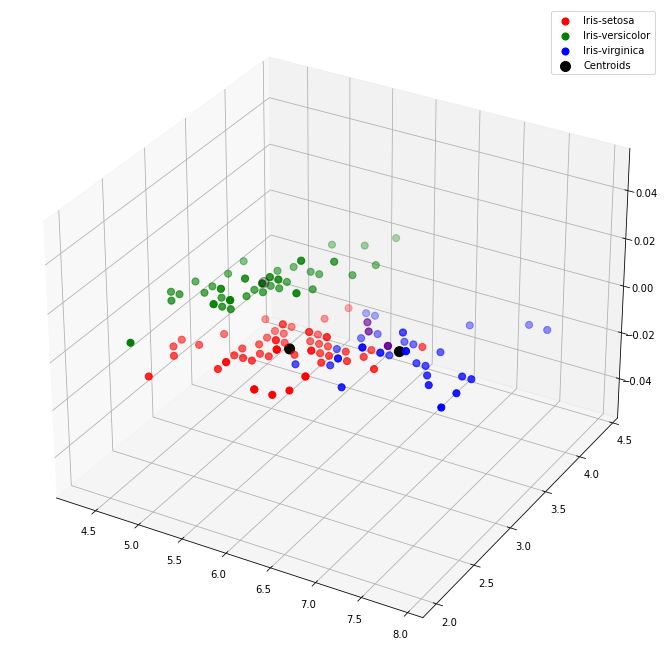

In [82]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=50, c= 'red',label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=50, c= 'green',label='Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=50, c= 'blue',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c= 'black',label='Centroids')

plt.legend()
plt.show()


In [83]:
df1 = df.copy()
df1['Predicted_Species'] = kmeans.labels_
df1


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,0
148,6.5,3.0,5.2,2.0,Iris-virginica,2


In [84]:
# Checking for any errors

for i in df1['Species'].value_counts().index:
    
    print(i,'\n',df1.loc[df1['Species'] == i]['Predicted_Species'].value_counts(),'\n')


Iris-virginica 
 2    36
0    14
Name: Predicted_Species, dtype: int64 

Iris-setosa 
 1    50
Name: Predicted_Species, dtype: int64 

Iris-versicolor 
 0    48
2     2
Name: Predicted_Species, dtype: int64 



In [85]:
# encoding the Species
df1['Actual_species'] = df1['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
df1


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species,Actual_species
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
147,6.3,2.5,5.0,1.9,Iris-virginica,0,2
148,6.5,3.0,5.2,2.0,Iris-virginica,2,2


# Cluster Evaluation


confusion_matrix and classification_report

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(df1['Actual_species'],df1['Predicted_Species']))


              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



<AxesSubplot:>

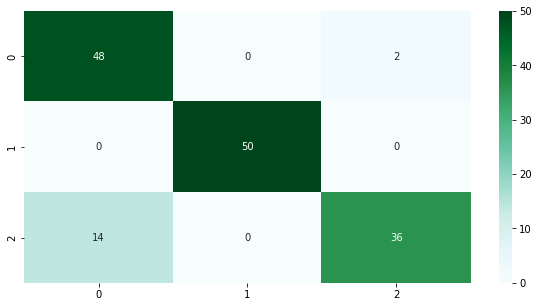

In [87]:
sns.heatmap(confusion_matrix(df1['Actual_species'],df1['Predicted_Species']), annot=True,cmap='BuGn')

# **Thanks for watching**